### Loads all the csv files

In [49]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline


df_monthly_sales    = pd.read_csv("../p2-2010-pawdacity-monthly-sales.csv")
df_web_scrape       = pd.read_csv("../p2-partially-parsed-wy-web-scrape.csv")
df_naics_data       = pd.read_csv("../p2-wy-453910-naics-data.csv")
df_demographic_data = pd.read_csv("../p2-wy-demographic-data.csv")

### Checking out data headers

In [50]:
# display(df_monthly_sales)
# display(df_web_scrape)
# display(df_naics_data)
# display(df_demographic_data)

### Working on the df_monthly_sales

In [51]:
### Removing unnecessary stuff
unnecessaryAtts = ['NAME', 'ADDRESS', 'STATE', 'ZIP']
for att in unnecessaryAtts:
    df_monthly_sales.drop(att, axis = 1, inplace = True)

### Summing the values by city
df_monthly_sales = df_monthly_sales.groupby('CITY').sum().reset_index()

### Converting all values to numeric (except CITY)
for att in df_monthly_sales.columns.values:
    if att != "CITY":
        df_monthly_sales[att] = pd.to_numeric(df_monthly_sales[att])

### Creating the Total Pawdacity Sales
values = df_monthly_sales.drop('CITY', axis = 1)
# print values.dtypes
df_monthly_sales['Total Pawdacity Sales'] = values.sum(axis = 1) 

### keeps only CITY and Total Pawdacity Sales columns
aux = df_monthly_sales[['CITY', 'Total Pawdacity Sales']]
df_monthly_sales = aux

df_monthly_sales['CITY'] = df_monthly_sales['CITY'].str.strip()

# display(df_monthly_sales)

### Working on the NAICS data

In [52]:
### None of these attributes are needed in this first part of the project

### Working on the Demographic data

In [53]:
unnecessaryAttributes = ["County"]
for att in unnecessaryAttributes:
    df_demographic_data.drop(att, axis = 1, inplace = True)
    
    
### Changes City to CITY
df_demographic_data["CITY"] = df_demographic_data["City"]
df_demographic_data.drop('City', axis = 1, inplace = True)

df_demographic_data['CITY'] = df_demographic_data['CITY'].str.strip()


### Summs up per city
df_demographic_data = df_demographic_data.groupby('CITY').sum().reset_index()


display(df_demographic_data)

,CITY,Land Area,Households with Under 18,Population Density,Total Families
0,Afton,853.806650,497,0.93,1040.41
1,Albin,7.685902,37,0.10,74.87
2,Alpine,366.598892,213,0.40,446.72
3,Baggs,253.240322,62,0.06,129.53
4,Bairoil,29.459830,18,0.01,33.70
5,Bar Nunn,208.573220,417,0.60,843.88
6,Basin,543.951304,250,0.66,566.43
7,Bear River,66.040927,98,0.33,179.24
8,Big Piney,710.489357,186,0.31,384.80
9,Buffalo,3115.507500,746,1.55,1819.50


### Working on the df_web_scrape

In [54]:
### Cleans HTML stuff
for att in df_web_scrape.columns.values:    
    df_web_scrape[att] = df_web_scrape[att].str.replace("<td>", "")
    df_web_scrape[att] = df_web_scrape[att].str.replace("</td>", "")
    df_web_scrape[att] = df_web_scrape[att].str.replace("<sup.*?>(.+?)</sup>", "")
df_web_scrape = df_web_scrape.ix[df_web_scrape['City|County'].notnull()]    

### Breaks city and county into two different attributes
df_web_scrape['City'], df_web_scrape['County'] = df_web_scrape['City|County'].str.split('|', 1).str

### Cleans city attribute
df_web_scrape['CITY'] = df_web_scrape['City'].str.replace("?", "")

#Drops unnecessary stuff
unnecessaryAtts = ['City', 'City|County', '2014 Estimate', '2000 Census', 'County']
for att in unnecessaryAtts:
    df_web_scrape.drop(att, axis = 1, inplace = True)

df_web_scrape['2010 Census'] = df_web_scrape['2010 Census'].astype(str)
df_web_scrape['2010 Census'] = df_web_scrape['2010 Census'].str.replace(",", "")
# print df_web_scrape.dtypes
df_web_scrape['2010 Census'] = pd.to_numeric(df_web_scrape['2010 Census'])

### Trims CITY attribute
df_web_scrape['CITY'] = df_web_scrape['CITY'].str.strip()

display(df_web_scrape)


,2010 Census,CITY
0,1911,Afton
1,181,Albin
2,828,Alpine
3,440,Baggs
4,106,Bairoil
5,2213,Bar Nunn
6,1285,Basin
7,518,Bear River
8,552,Big Piney
9,4585,Buffalo


### Ready, set, mark: Time to join!!!

In [55]:
df_monthly_sales.set_index('CITY')
df_web_scrape.set_index('CITY')
df_demographic_data.set_index('CITY')
display(df_monthly_sales)
display(df_web_scrape)
display(df_demographic_data)


result = df_monthly_sales.join(df_web_scrape.set_index('CITY'), on='CITY')
display(result)
result = result.join(df_demographic_data.set_index('CITY'), on='CITY')
display(result)

,CITY,Total Pawdacity Sales
0,Buffalo,185328
1,Casper,317736
2,Cheyenne,917892
3,Cody,218376
4,Douglas,208008
5,Evanston,283824
6,Gillette,543132
7,Powell,233928
8,Riverton,303264
9,Rock Springs,253584


,2010 Census,CITY
0,1911,Afton
1,181,Albin
2,828,Alpine
3,440,Baggs
4,106,Bairoil
5,2213,Bar Nunn
6,1285,Basin
7,518,Bear River
8,552,Big Piney
9,4585,Buffalo


,CITY,Land Area,Households with Under 18,Population Density,Total Families
0,Afton,853.806650,497,0.93,1040.41
1,Albin,7.685902,37,0.10,74.87
2,Alpine,366.598892,213,0.40,446.72
3,Baggs,253.240322,62,0.06,129.53
4,Bairoil,29.459830,18,0.01,33.70
5,Bar Nunn,208.573220,417,0.60,843.88
6,Basin,543.951304,250,0.66,566.43
7,Bear River,66.040927,98,0.33,179.24
8,Big Piney,710.489357,186,0.31,384.80
9,Buffalo,3115.507500,746,1.55,1819.50


,CITY,Total Pawdacity Sales,2010 Census
0,Buffalo,185328,4585
1,Casper,317736,55316
2,Cheyenne,917892,59466
3,Cody,218376,9520
4,Douglas,208008,6120
5,Evanston,283824,12359
6,Gillette,543132,29087
7,Powell,233928,6314
8,Riverton,303264,10615
9,Rock Springs,253584,23036


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
0,Buffalo,185328,4585,3115.507500,746,1.55,1819.50
1,Casper,317736,55316,3894.309100,7788,11.16,8756.32
2,Cheyenne,917892,59466,1500.178400,7158,20.34,14612.64
3,Cody,218376,9520,2998.956960,1403,1.82,3515.62
4,Douglas,208008,6120,1829.465100,832,1.46,1744.08
5,Evanston,283824,12359,999.497100,1486,4.95,2712.64
6,Gillette,543132,29087,2748.852900,4052,5.80,7189.43
7,Powell,233928,6314,2673.574550,1251,1.62,3134.18
8,Riverton,303264,10615,4796.859815,2680,2.34,5556.49
9,Rock Springs,253584,23036,6620.201916,4022,2.78,7572.18


In [56]:
display(result.describe())

,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,343027.636364,21260.181818,3006.489126,3096.727273,5.709091,5695.708182
std,213538.712215,19389.474205,1617.460342,2453.003061,5.849685,3816.049660
min,185328.000000,4585.000000,999.497100,746.000000,1.460000,1744.080000
25%,226152.000000,7917.000000,1861.721074,1327.000000,1.720000,2923.410000
50%,283824.000000,12359.000000,2748.852900,2646.000000,2.780000,5556.490000
75%,312984.000000,26061.500000,3504.908300,4037.000000,7.390000,7380.805000
max,917892.000000,59466.000000,6620.201916,7788.000000,20.340000,14612.640000


In [57]:
display(result)

,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
0,Buffalo,185328,4585,3115.507500,746,1.55,1819.50
1,Casper,317736,55316,3894.309100,7788,11.16,8756.32
2,Cheyenne,917892,59466,1500.178400,7158,20.34,14612.64
3,Cody,218376,9520,2998.956960,1403,1.82,3515.62
4,Douglas,208008,6120,1829.465100,832,1.46,1744.08
5,Evanston,283824,12359,999.497100,1486,4.95,2712.64
6,Gillette,543132,29087,2748.852900,4052,5.80,7189.43
7,Powell,233928,6314,2673.574550,1251,1.62,3134.18
8,Riverton,303264,10615,4796.859815,2680,2.34,5556.49
9,Rock Springs,253584,23036,6620.201916,4022,2.78,7572.18


In [58]:
for att in result.columns.values:
    if att != 'CITY':
#         result[att] = pd.to_numeric(result[att])
        _sum = result[att].sum()
        _avg = result[att].mean()
        print "{} - sum = {} \t avg = {}".format(att, _sum, _avg)

Total Pawdacity Sales - sum = 3773304 	 avg = 343027.636364
2010 Census - sum = 233862 	 avg = 21260.1818182
Land Area - sum = 33071.380389 	 avg = 3006.48912627
Households with Under 18 - sum = 34064 	 avg = 3096.72727273
Population Density - sum = 62.8 	 avg = 5.70909090909
Total Families - sum = 62652.79 	 avg = 5695.70818182


### Dealing with outliers

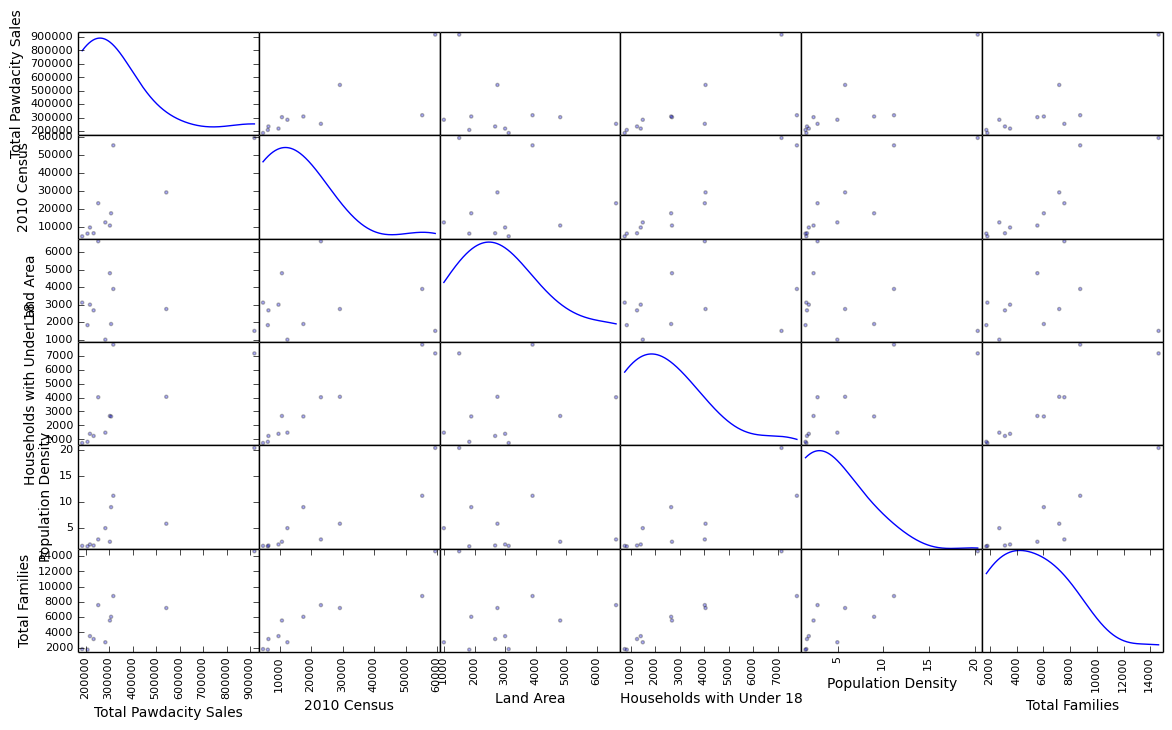

In [59]:
pd.scatter_matrix(result, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Tukey test

In [60]:
# Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in result.columns.values:
    if feature != "CITY":    
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(result.loc[:, feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(result.loc[:, feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5 * (Q3 - Q1)

        # Display the outliers
        print "Data points considered outliers for the feature '{}':".format(feature)
        outliers_for_feature = result[~((result[feature] >= Q1 - step) & (result[feature] <= Q3 + step))]
    #     print list(outliers_for_feature.index)
        outliers.append(outliers_for_feature.index)
        display(result[~((result[feature] >= Q1 - step) & (result[feature] <= Q3 + step))])

    
# outliers is now a list of lists, so we need to make them 
# unique by removing all values from the inner lists
outliers = [item for sublist in outliers for item in sublist]
# print outliers

# one of the following questions ask for the outliers that 
# appear for more than one attribute, so let's compute it
multiple_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
print 'Multiple outliers found: ', multiple_outliers


good_data = result.drop(result.index[multiple_outliers]).reset_index(drop = True)
print 'Shape of data is now {}'.format(good_data.shape)

Data points considered outliers for the feature 'Total Pawdacity Sales':


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
2,Cheyenne,917892,59466,1500.1784,7158,20.34,14612.64
6,Gillette,543132,29087,2748.8529,4052,5.80,7189.43


Data points considered outliers for the feature '2010 Census':


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
1,Casper,317736,55316,3894.3091,7788,11.16,8756.32
2,Cheyenne,917892,59466,1500.1784,7158,20.34,14612.64


Data points considered outliers for the feature 'Land Area':


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
9,Rock Springs,253584,23036,6620.201916,4022,2.78,7572.18


Data points considered outliers for the feature 'Households with Under 18':


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families


Data points considered outliers for the feature 'Population Density':


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
2,Cheyenne,917892,59466,1500.1784,7158,20.34,14612.64


Data points considered outliers for the feature 'Total Families':


,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
2,Cheyenne,917892,59466,1500.1784,7158,20.34,14612.64


Multiple outliers found:  [2]
Shape of data is now (10, 7)


In [61]:
display(good_data)

,CITY,Total Pawdacity Sales,2010 Census,Land Area,Households with Under 18,Population Density,Total Families
0,Buffalo,185328,4585,3115.507500,746,1.55,1819.50
1,Casper,317736,55316,3894.309100,7788,11.16,8756.32
2,Cody,218376,9520,2998.956960,1403,1.82,3515.62
3,Douglas,208008,6120,1829.465100,832,1.46,1744.08
4,Evanston,283824,12359,999.497100,1486,4.95,2712.64
5,Gillette,543132,29087,2748.852900,4052,5.80,7189.43
6,Powell,233928,6314,2673.574550,1251,1.62,3134.18
7,Riverton,303264,10615,4796.859815,2680,2.34,5556.49
8,Rock Springs,253584,23036,6620.201916,4022,2.78,7572.18
9,Sheridan,308232,17444,1893.977048,2646,8.98,6039.71
